In [32]:
from sympy import *
init_printing()

In [33]:
#subscript 0 = star, 1 = planetesimal, 2 = planet
m0,v0,v,a,G,O,a,b = symbols("m0, v0, v, a, G, O, a, b")
r0,r1,r2,p0,p1,p2 = symbols("r0,r1,r2,p0,p1,p2")

In [34]:
#masses
m1 = m0*a*O**2
m2 = m0*b*O

#Jacobi variables
M1 = m0 + m1
M2 = m0 + m1 + m2
m1p = m1*m0/M1           #p for prime, as in jacobi coordinates
m2p = m2*M1/M2
r1p = r1 - r0
r2p = r2 - (m1*r1 + m0*r0)/M1
p1p = m1p*(p1/m1 - p0/m0)
p2p = m2p*(p2/m2 - p1/M1 - p0/M1)

In [35]:
H_k = p2p*p2p/m2p/2 + p1p*p1p/m1p/2 - G*M1*m1p/r1p - G*M2*m2p/r2p
H_i = -G*m1*m2/(r1 - r2) - G*m0*m2/(r0 - r2) + G*M2*m2p/r2p

In [36]:
A = -(diff(H_k,p0)*diff(H_i,r0) + diff(H_k,p1)*diff(H_i,r1) + diff(H_k,p2)*diff(H_i,r2))
B = H_k/2 + H_i

In [65]:
#differentiate
diff0 = diff(A,r0)*diff(B,p0) - diff(A,p0)*diff(B,r0)
diff1 = diff(A,r1)*diff(B,p1) - diff(A,p1)*diff(B,r1)
diff2 = diff(A,r2)*diff(B,p2) - diff(A,p2)*diff(B,r2)
result = diff0 + diff1 + diff2

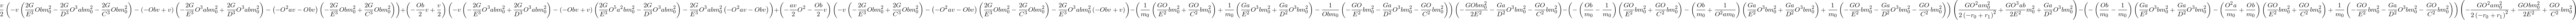

In [66]:
C,D,E,F = symbols("C, D, E, F")
result = result.subs({p0:m0*v0, p1:m1*v, p2:m2*v})
result = result.subs({r0 - r2:C, r1 - r2:D, r2 - (O**2*a*m0*r1 + m0*r0)/(O**2*a*m0 + m0):E})
result = result.subs({v-v0:v, -O**2*a*m0*v/(O**2*a*m0+m0)-m0*v0/(O**2*a*m0+m0)+v:v, -O**2*a*(v-v0)-O*b*v:-O*b*v, -O*b*v+v-v0:v, -O*b*v/2+v/2-v0/2:v/2})
result = result.subs({O**2*a*m0+m0:m0, O**2*a*m0+O*b*m0+m0:m0, O**2*a/m0+O*b/m0:O*b/m0, O*b/m0+1/(O**2*a*m0):1/(O**2*a*m0), O*b/m0-1/m0:1/m0})
result

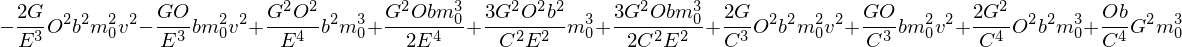

In [68]:
result = expand(result)
result = result.subs({O**11:0,O**10:0,O**9:0,O**8:0,O**7:0,O**6:0,O**5:0,O**4:0,O**3:0})
result

In [10]:
#result = factor(result)
#result